<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Выгрузка" data-toc-modified-id="Выгрузка-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Выгрузка</a></span></li><li><span><a href="#Проверка-соотношения-целевого-признака-'Toxic'" data-toc-modified-id="Проверка-соотношения-целевого-признака-'Toxic'-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Проверка соотношения целевого признака 'Toxic'</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Общая-обработка-текста" data-toc-modified-id="Общая-обработка-текста-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая обработка текста</a></span><ul class="toc-item"><li><span><a href="#Удаление-лишнего" data-toc-modified-id="Удаление-лишнего-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Удаление лишнего</a></span></li></ul></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Лемматизация</a></span><ul class="toc-item"><li><span><a href="#NLTK" data-toc-modified-id="NLTK-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NLTK</a></span></li><li><span><a href="#Spacy" data-toc-modified-id="Spacy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spacy</a></span></li><li><span><a href="#Experimental-lemmatization-(upd.)" data-toc-modified-id="Experimental-lemmatization-(upd.)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Experimental lemmatization (upd.)</a></span></li></ul></li><li><span><a href="#Проверка-качества--моделей" data-toc-modified-id="Проверка-качества--моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка качества  моделей</a></span><ul class="toc-item"><li><span><a href="#HalvingGreadSearch" data-toc-modified-id="HalvingGreadSearch-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>HalvingGreadSearch</a></span><ul class="toc-item"><li><span><a href="#Функции" data-toc-modified-id="Функции-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Функции</a></span></li><li><span><a href="#Настройки-параметров" data-toc-modified-id="Настройки-параметров-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Настройки параметров</a></span></li><li><span><a href="#Запуск-валидации" data-toc-modified-id="Запуск-валидации-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Запуск валидации</a></span></li></ul></li></ul></li><li><span><a href="#Результаты-Кросвалидации" data-toc-modified-id="Результаты-Кросвалидации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результаты Кросвалидации</a></span></li><li><span><a href="#Обучение-лучшей-модели" data-toc-modified-id="Обучение-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение лучшей модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта
Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 


# Задача
Обучить модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.
Значение метрики качества F1 у модели должно быть не меньше 0.75. 

# Установка дополнительных библиотек

In [1]:
#NLTK для лемматизации
#!pip install nltk
#!pip install tqdm
#!pip3 install torch
#!pip3 install transformers
#!pip install swifter

In [2]:
#!pip install textblob 

In [3]:
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_trf
#!python -m spacy download en_core_web_lg   # python -m spacy download en_core_web_lg

In [4]:
#!pip install catboost

# Импорт библиотек

In [5]:
import time
import string 
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
#Метрики
from sklearn.metrics import accuracy_score, f1_score

In [6]:
#Отображение прогресс баров
from tqdm import tqdm, tqdm_notebook
from swifter import swifter

In [7]:
%%time
#Мы будем работать с твитами, даже несмотря на датафрейм 
#есть уверенность, что в тексте будут опечатки, попробуем в дальнейшем их исправить с помощью библиотеки textblob
#from textblob import TextBlob 

# UPD.Метод исправляет сленг и увеличивает время работы лематайзера, 
#принимаем решение не использовать, но оставляем, возможно понадобится в дальнейшем.

Wall time: 0 ns


In [8]:
%%time
#Импорт и настройка лемматизатора NLTK
import nltk
nltk.download('omw-1.4')
nltk.download("stopwords") # поддерживает удаление стоп-слов
nltk.download('punkt') # делит текст на список предложений
nltk.download('wordnet') # проводит лемматизацию
from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer #стандартный лемматизатор/токенизатор
from nltk.tokenize import TreebankWordTokenizer #мы выбрали более подходящий токенизатор
# Для POS тегов
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dente\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dente\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dente\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dente\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dente\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Wall time: 18.3 s


True

In [9]:
%%time
#Импорт и настройка лемматизатора SPICY
import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

Wall time: 45.8 s


In [10]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

In [11]:
#Изменим настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', str)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 50)
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

SEED = 692281488

In [12]:
#Имортируем модули для создания эмбендингов
# импортируем модуль CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# импортируем модуль TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [14]:
#Загружаем модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

In [102]:
from sklearn.dummy import DummyClassifier

### Выгрузка

In [15]:
try:
    df_org = pd.read_csv('C:/Users/dente/Desktop/Обучение/DS/Проекты/dataset/toxic_comments.csv', index_col=[0])
except:
    df_org = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv', index_col=[0])

### Проверка соотношения целевого признака 'Toxic'

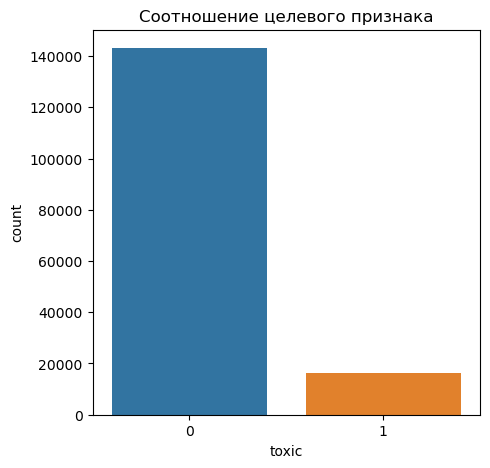

In [16]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_org, x="toxic")
plt.title('Соотношение целевого признака')
plt.show()

Токсичных комментарие в выборке заметно меньше, учтём это на разделении выборок и обучении

# Создание выборки для первичного анализа

In [17]:
# Создадим срез, которым будем пользовать для оценки быстродействия
df_new = df_org.sample(100).reset_index(drop=True) 
df_new[df_new['toxic'] == 1].head(40)


,text,toxic
8,"YOU SUCK \n\nI HATE YOU> YOU CAN FUCK MY ASS ALL NIGHT BITCH SHit\n\nLove , David Ortiz",1
13,"Vietnamese films \n\nHey, lazy guy. Here is what the fucking film list looked like two days ago.\n\nThe Quiet American (film) (1958)\nMotorpsycho (1965)\n To the Shores of Hell (1966)\n The Green Berets (1968)\n Heroes (1977)\n The Boys in Company C (1978)\n Coming Home (1978)\n The Deer Hunter (1978) \n Go Tell the Spartans (1978)\n My Husband is Missing (1978)\n Apocalypse Now (1979)\n The Odd Angry Shot (1979)\n The War at Home (1979)\n A Rumor of War (1980)\n The Exterminator (1980)\n L'ultimo cacciatore (1980)\n How Sleep the Brave (1981)\n First Blood (1982)\n Uncommon Valor (1983)\n The Killing Fields (1984)\n Missing in Action (1984)\n Missing in Action 2: The Beginning (1985)\n Combat Shock (1986)\n Platoon (1986)\n Full Metal Jacket (1987)\n Phantom Soldiers (1987)\n Good Morning, Vietnam (1987)\n Hamburger Hill (1987)\n The Hanoi Hilton (1987)\n Bat*21 (1988)\n Braddock: Missing in Action III (1988)\n Platoon Leader (1988)\n Off Limits (1988)\n Operation Warzone (1988)\n Jacknife (1989)\n Casualties of War (1989)\n Born on the Fourth of July (1989)\n The Siege of Firebase Gloria (1989)\n The Expendables (1989)\n 84C MoPic (Charlie Mopic) (1989)\n The Iron Triangle (1989)\n Air America (1990)\n Bullet in the Head (1990)\n Jacob's Ladder (1990)\n Flight of the Intruder (1991)\n Dien Bien Phu (1992)\n Heaven & Earth (1993)\n Message From Nam (1993)\n Forrest Gump (1994)\n Operation Dumbo Drop (1995)\n Dead Presidents (1995)\n A Bright Shining Lie (1998) (TV Film)\n Tigerland (2000)\n Going Back (2001)\nThe Quiet American (2002 film) (2002)\n Path to War (2002)\n We Were Soldiers (2002)\n In the Shadow of the Blade (2004)\n Enemy Image (2005)\n Across the Universe (2007)\n Journey from the Fall (2007)\n The Veteran (2006)\n Rescue Dawn (2006)\n 1968 Tunnel Rats (2007)\n Tropic Thunder (2008)\n Watchmen (2009)\n\nWhere the hell were you when me and Dewaine turned it into a bloody table, eh?\n\nHave you read the talk page yet? When were you in Vietnam?",1
22,Ban this Jerk\nSomeone needs to ban this jerk for deleting articles before we can even get them off the ground.,1
29,"Ah yes, she is not insane, she uses highly allusive language, so that another humanities professor can spout nonsense at the taxpayer's expense on what the hallowed cow meant to say.137.205.183.70",1
42,SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK ME\n SUCK MENEW,1
43,"ZOE REARS HER UGLY FACE\nCOCKBLOCKER IS A SPECIES OF LOOSER WHO TAKES PLEASURE IN PREVENTING OTHERS FROM ACHIEVING ANYTHING EITHER. THE WIKIPEDIA SUBSPICIES GOES AROUND AND T

### Промежуточный вывод
Твиттер это специфичная платформа со своими паттернами и правилами. Для начала нам необходимо избавиться от дат, ссылок и хештегов.

## Общая обработка текста

### Удаление лишнего

In [18]:
def clean_text(data_text):   #Первичная обработка
    text = re.sub("https?:\/\/.*[\r\n]*", "", data_text.lower()) #Ссылки
    text = re.sub("@\S+", "", text) #Упоминания 
    text = re.sub(r"\(utc\)", "", text) # Обозначение даты
    text = re.sub("\$", "", text) #Валюта
    text = re.sub(r"\d+", "", text) # Цифры
    text = re.sub(r'\s+', ' ', text, flags=re.I) #Двойные пробелы
    return text
#Лемматизация текста
#lemma_list_spacy = [token.lemma_ for token in nlp(text)]
#Удаление стоп-слов
#normalized_tokens = " ".join([word for word in lemma_list_spacy if nlp.vocab[word].is_stop == False])

#clean_text_spacy  = " ".join((re.sub(r'[^a-zA-Z]',' ', normalized_tokens)).split())

#Удаление одиночных символов
#clean_text_spacy = re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_text_spacy) 

In [19]:
df_for_lemmatize = df_org.copy()

In [20]:
df_for_lemmatize['clean_text'] = (
    df_for_lemmatize['text']
    .swifter
    .progress_bar(enable=True, desc='bar description')
    .apply(clean_text, axis=1)
)

bar description:   0%|          | 0/159292 [00:00<?, ?it/s]

# Строка для сравнения

In [22]:
#Строка для сравнения
sentence_row = df_for_lemmatize.loc[26, 'clean_text']

In [23]:
sentence_row

"there's no need to apologize. a wikipedia article is made for reconciling knowledge about a subject from different sources, and you've done history studies and not archaeology studies, i guess. i could scan the page, e-mail it to you, and then you could ask someone to translate the page."

Созданная нами функция работает и возвращает нам датафрейм, очищенный от шума.

## Лемматизация
Для подбора оптимальной модели мы будем проверять не только их работу с разными гиперпараметрами, но и создадим несколько эмбендингов из очищенного текста. 

### NLTK

In [24]:
#Активируем лемматайзер, токенизатор и загружаем стоп слова
lemmatizer_nltk = WordNetLemmatizer()
tokenizer_nltk = TreebankWordTokenizer()
stop_words = nltk_stopwords.words('english')

In [25]:
#Создадим функцию для поиска POS тега слова, при лемматизации он укажет необходимую форму слова
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    word_tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(word_tag, wordnet.NOUN)


In [26]:
def lemm_text_nltk(row_for_lemmatize):
    new_text = []
        
    # токенизируем слова
    # Используем TreebankWordTokenizer, так как он не разделяет пунктуационную цензуру в словах 
    # на отдельные токены и у него есть параметр, заменяющий скобки на абреввиатуру (возможно, закодируем смайлики)
    # convert_parentheses if True, replace parentheses to PTB symbols, e.g. '(' to -LRB-. Defaults to False.
    text = tokenizer_nltk.tokenize(row_for_lemmatize, convert_parentheses=True)
    
    #Очищаем токены от шума
    text = [re.sub(r'[^a-zA-Z]', '', token.strip()) for token in text]
    # лемматирзируем слова и удаляем стоп слова  
    clean_text_nltk = " ".join(
        [lemmatizer_nltk.lemmatize(word, get_wordnet_pos(word))\
         for word in text if word not in stop_words and word != " "]
    )
    
    # соединяем слова, удаляя лишние пробелы
    clean_text_nltk  = " ".join(clean_text_nltk.split())
    #clean_text_nltk  = " ".join((re.sub(r'[^a-zA-Z]',' ', clean_text_nltk)).split())
    #Удаляем все единичные объекты
    #clean_text_nltk = re.sub(r'\s+[a-zA-Z]\s+', '', clean_text_nltk)   
    
    new_text.append(clean_text_nltk.strip())
    return new_text[0]

In [27]:
#Проверим работу функции
print(lemm_text_nltk(sentence_row))
print(sentence_row)

need apologize wikipedia article make reconcile knowledge subject different source do history study archaeology study guess could scan page email could ask someone translate page
there's no need to apologize. a wikipedia article is made for reconciling knowledge about a subject from different sources, and you've done history studies and not archaeology studies, i guess. i could scan the page, e-mail it to you, and then you could ask someone to translate the page.


In [28]:
try:
    df_for_lemmatize = pd.read_csv(
        'C:/Users/dente/Desktop/Обучение/DS/Проекты/df_text_clean_nltk.csv', index_col=[0]
    )
except:
    df_for_lemmatize['lemm_text_nltk'] = (
    df_for_lemmatize['clean_text']
    .swifter
    .progress_bar(enable=True, desc='bar description')
    .apply(lemm_text_nltk, axis=1)
).dropna()
    df_for_lemmatize.to_csv('df_text_clean_nltk.csv')

In [29]:
df = df_for_lemmatize.copy()
print(df.shape)
display(df.head(5))

(159137, 4)


,text,toxic,clean_text,lemm_text_nltk
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,"explanation why the edits made under my username hardcore metallica fan were reverted? they weren't vandalisms, just closure on some gas after i voted at new york dolls fac. and please don't remove the template from the talk page since i'm retired now....",explanation edits make username hardcore metallica fan revert nt vandalism closure gas vote new york doll fac please nt remove template talk page since retire
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,"d'aww! he matches this background colour i'm seemingly stuck with. thanks. (talk) :, january ,",daww match background colour seemingly stuck thanks LRB talk RRB january
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,"hey man, i'm really not trying to edit war. it's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. he seems to care more about the formatting than the actual info.",hey man really try edit war guy constantly remove relevant information talk edits instead talk page seem care format actual info
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,""" more i can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know. there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up. it's listed in the relevant form eg wikipedia:good_article_nominations#transport """,ca nt make real suggestion improvement wonder section statistic later subsection type accident think reference may need tidy exact format ie date format etc later noone else first preference format style reference want please let know appear backlog article review guess may delay reviewer turn list relevant form eg wikipedia goodarticlenominations transport
4,"You, sir, are my hero. Any chance you remember what page that's on?",0,"you, sir, are my hero. any chance you remember what page that's on?",sir hero chance remember page


In [30]:
#Сохраняем преобразованный текст
corpus_nltk = df_for_lemmatize['lemm_text_nltk'].values
print(corpus_nltk.shape)

(159137,)


### Spacy

In [31]:
#Загружаем нужную модель Spacy
nlp = spacy.load("en_core_web_lg")
#tokenizer_spicy = vocab_spicy.tokenizer

In [32]:
#Spacy позволяет проводить векторизацию сразу, что несколько ускорит обработку
features_spacy = np.array(
    [tweet.vector for tweet in tqdm_notebook(nlp.pipe(df['clean_text'], disable = ['parse', 'ner']))]
)

0it [00:00, ?it/s]

### Experimental lemmatization (upd.)

<br>Параллельно с просчётом гиперпараметров в проекте, был запущен подбор гиперпараметров во внешней среде с более широким диапозоном значений. 
<br>К сожалению, максимальная метрика, которой удалось добиться - составляет не более 76. 
<br>Попробуем скомбинировать методы лемматизации и уменшить вес повторяющихся слов в качестве эксперимента.
<br>Для токенизации и очистки текста от шума применим nltk, лемматизацию проведём с помощью Spacy, а векторизацию сделаем сразу через TF-iDF vectorizer

In [33]:
stopwords_spacy = nlp.Defaults.stop_words

In [34]:
def lemm_text_experimental(row_for_lemmatize):
    new_text = []
        
    # токенизируем слова
    # Используем TreebankWordTokenizer, так как он не разделяет пунктуационную цензуру в словах 
    # convert_parentheses на этот раз использовать не будем
    
    text = tokenizer_nltk.tokenize(row_for_lemmatize, convert_parentheses=False)
    
    #Очищаем токены от шума и соединяем их вновь
    text = " ".join([re.sub(r'[^a-zA-Z]', '', token.strip()) for token in text])
    
    # лемматирзируем слова и удаляем стоп слова  
    text_spacy = nlp(text, disable = ['parse', 'ner','word2vec' ])
    
    clean_text_experimental = " ".join(set([token.lemma_ for token in text_spacy \
                                           if str(token) != " "  and str(token) not in stopwords_spacy]))
    # соединяем слова, удаляя лишние пробелы
    clean_text_experimental  = " ".join(clean_text_experimental.split())
    #clean_text_nltk  = " ".join((re.sub(r'[^a-zA-Z]',' ', clean_text_nltk)).split())
    #даляем все единичные объекты
    clean_text_experimental = re.sub(r'\s+[a-zA-Z]\s+', '', clean_text_experimental).strip()   
    
    new_text.append(clean_text_experimental.strip())
    return new_text[0]

In [35]:
try:
    df_for_lemmatize = pd.read_csv(
        'C:/Users/dente/Desktop/Обучение/DS/Проекты/df_text_clean_experimental.csv', index_col=[0]
    )
except:
    df_for_lemmatize['lemm_text_experimental'] = (
    df_for_lemmatize['clean_text']
    .swifter
    .progress_bar(enable=True, desc='bar description')
    .apply(lemm_text_experimental, axis=1)
).dropna()
    df_for_lemmatize.to_csv('df_text_clean_experimental.csv')

bar description:   0%|          | 0/159137 [00:00<?, ?it/s]

In [36]:
#Сохраняем преобразованный текст
features_experimental = df_for_lemmatize['lemm_text_experimental'].values
print(features_experimental.shape)

(159137,)


## Проверка качества  моделей

In [48]:
#Функция получения имени модели
def get_model_name(model):
    model_name = str(model).split("(")[0]
    model_name = (re.sub(r'[^a-zA-Z]',' ', model_name).split())
    return model_name[0]

In [49]:
#Список моделей
models_list = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=SEED),
    #KNeighborsClassifier(), #Kneighboors - показывает плохие результаты и долго даёт предсказания
    #svm.SVC(random_state=SEED), #SVC даёт неплохие результаты, близкие к нужным,
    #но обучается больше часа, сложно подбирать параметры
    AdaBoostClassifier(random_state=SEED), 
    CatBoostClassifier(random_state=SEED, verbose=True) 
         ]

### HalvingGreadSearch

#### Функции

In [50]:
def feautures_split(X_feautures, y_feautures):
    return train_test_split(X_feautures, y_feautures, test_size = 0.10, random_state=SEED, stratify = y_feautures)  

In [51]:
#Функция для создания словаря Pipeline
def methode_dict_for_model_create(model):
    m_name = get_model_name(model)
    pipeline_methode_dict = {
    3 : [
        'NLTK Count Vectorise',  
         [('CountVectorizer', CountVectorizer(stop_words="english")), (m_name, model) ]
    ],
    1 : [
        'NLTK TFIDF', 
        [('CountVectorizer', CountVectorizer(stop_words="english")), ('TFIDF', TfidfTransformer(use_idf=True)), (m_name, model) ]
    ],
    2 : [
        'Spacy', [(m_name, model)]
    ],
    0 : [
        'Experimental TFIDF', 
        [('TFIDF_vectorizer', TfidfVectorizer(use_idf=True)), (m_name, model) ]
    ]
    }
    return m_name, pipeline_methode_dict

In [52]:
#Функция для кросвалидации
def model_intarations(data, pipeline_model, meth_name, mod_name, index_mod):    
    print(index_mod)
    y = data['toxic']
             
    if meth_name in no_pipe_vectorize_list:
        X = features_spacy
        
    elif meth_name == 'Experimental TFIDF':
        X = features_experimental
        y = df_for_lemmatize['toxic']
    else:
        X = corpus_nltk
    x_train, x_test, y_train, y_test = feautures_split(X, y)
    #Запуск подбора параметров
    grid_search = HalvingGridSearchCV(
            estimator=pipeline_model,
            param_grid=param_gridsearch[index_mod+delta_index],
            cv = cv_gridsearch,
            scoring = scoring_gridsearch, 
            verbose = verbose_gridsearch,
            #n_jobs = n_jobs_gridsearch,
            aggressive_elimination=False, # или False, если не указываем min_resources
            min_resources="exhaust", #или "exhaust" для автоопределения объёма начальных выборок
            factor=factor_hgs
            
        )
     
      
    
    
    #Обучение
    grid_search.fit(x_train, y_train)
    
    
    #Получение предсказаний 
    predict = grid_search.predict(x_test)
    
    #Получение статистики кроссвалидаций 
    results = grid_search.cv_results_
    #Индекс лучшей модели
    best_index = grid_search.best_index_
    
    #Получение искомых значений
    train_f1 = results['mean_test_score'].mean()
    fit_time = results['mean_fit_time'][best_index]
    score_time = results['mean_score_time'][best_index]
    
    #Получение метрик на тесте
    test_accuracy = accuracy_score(y_test,predict)
    test_f1 = f1_score(y_test,predict)
    
          
    df_score.loc[len(df_score.index)] =(
            [mod_name, meth_name,\
             train_f1, test_f1,\
             test_accuracy,\
             round(fit_time,3), round(score_time, 3), grid_search.best_params_]
        )
    print(df_score) 
    return df_score

In [53]:
#Функция для поиска лучших результатов с подбором гиперпараметров и типа векторизации текста
def raw_model_score_on_raw_embending (data, models_list):
    for index_model, model in tqdm_notebook(enumerate(models_list)):
    
        model_name, pipeline_dict = methode_dict_for_model_create(model) # Создание словаря для PipeLine
                
        for pipeline_index in tqdm_notebook(range(len(pipeline_dict))):
            method_name = pipeline_dict[pipeline_index][0]
                
            pipeline_model = Pipeline(pipeline_dict[pipeline_index][1])    
            
            df = model_intarations(
                data, pipeline_model, method_name, model_name, index_model
            )  
            
    return df_score

#### Настройки параметров

In [54]:
#Spacy использует собственный векторизатор, в дальнейшем исключим его из итерации
no_pipe_vectorize_list = ['Spacy']

In [55]:
#Создаём таблицу для сохранения результатов.
df_score = pd.DataFrame(columns=\
                      ['Модель', 'Параметры модели', 'F1 на обучении', 'F1 на тесте', \
                       'Accuracy на тесте', 'Время обучения', 'Время предсказания', 'Лучшие параметры'])


In [62]:
#Параметры моделей и Gridsearch
param_gridsearch = [
                    
                    #LogisticRegression
{
f'{get_model_name(models_list[0])}__C' : np.linspace(0.1, 15.0, num=8), #np.arange(0.1, 2.1, 20) / np.arange(0.1, 2.1, 0.1)
#'LogisticRegression__penalty' : ['l2'], #base = l2 , для lbfgs только l2
f'{get_model_name(models_list[0])}__solver' : ['lbfgs'], #['lbfgs', 'sag', 'saga']
f'{get_model_name(models_list[0])}__max_iter' : np.linspace(50, 500, num=3).astype(int) , #[10, 100, 1000, 10000] / range(50, 101, 50)
f'{get_model_name(models_list[0])}__class_weight' : ['balanced'] #[None , 'balanced']
                        
},
#DecisionTreeClassifier
{
f'{get_model_name(models_list[1])}__max_depth': [None, 3, 10, 15],
f'{get_model_name(models_list[1])}__min_samples_leaf': np.linspace(1, 15, num=3).astype(int),
f'{get_model_name(models_list[1])}__min_samples_split': np.linspace(2, 15, num=3).astype(int),
f'{get_model_name(models_list[1])}__class_weight' : ['balanced'] #[None , 'balanced']
},
                                            
 #Kneighboors - показывает плохие результаты и долго даёт предсказания
#{
#f'{get_model_name(models_list[2])}__n_neighbors' : np.linspace(3, 30, num=8).astype(int) #[None , 'balanced']
# },
 
 #SVC даёт неплохие результаты, близкие к нужным,
    #но обучается больше часа, сложно подбирать параметры
# {
#f'{get_model_name(models_list[3])}__decision_function_shape' : ['ovo', 'ovr'],
#f'{get_model_name(models_list[3])}__class_weight' : ['balanced'], #[None , 'balanced'],
#f'{get_model_name(models_list[3])}__C' : np.linspace(0.1, 5.0, num=4)
# },
#AdaBoostClassifier
 {
f'{get_model_name(models_list[2])}__n_estimators' : [50, 100, 200, 500],
f'{get_model_name(models_list[2])}__learning_rate' : np.linspace(1, 3, num=4),
 },
 #Catboost
 {
f'{get_model_name(models_list[3])}__learning_rate' : [0.03],
f'{get_model_name(models_list[3])}__depth' : np.linspace(6, 10, num=2).astype(int)

 }
    
  ]
n_jobs_gridsearch = -1                   
verbose_gridsearch = 3
cv_gridsearch = 3
scoring_gridsearch = 'f1'
#Параметры Halving GS
aggressive_elimination_hgs=True, # или False, если не указываем min_resources
min_resources_hgs=8600, #или "exhaust" для автоопределения объёма начальных выборок
factor_hgs=4

#### Запуск валидации


In [57]:
#df_score = raw_model_score_on_raw_embending(df, models_list) #Не буду запускать всё полностью

In [58]:
delta_index = 0 
print(get_model_name(models_list[delta_index]))
df_score = raw_model_score_on_raw_embending(df, models_list[:1])

LogisticRegression


0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 8951
max_resources_: 143223
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 24
n_resources: 8951
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END LogisticRegression__C=0.1, LogisticRegression__class_weight=balanced, LogisticRegression__max_iter=50, LogisticRegression__solver=lbfgs;, score=(train=0.892, test=0.675) total time=   1.0s
[CV 2/3] END LogisticRegression__C=0.1, LogisticRegression__class_weight=balanced, LogisticRegression__max_iter=50, LogisticRegression__solver=lbfgs;, score=(train=0.884, test=0.664) total time=   0.7s
[CV 3/3] END LogisticRegression__C=0.1, LogisticRegression__class_weight=balanced, LogisticRegression__max_iter=50, LogisticRegression__solver=lbfgs;, score=(train=0.887, test=0.669) total time=   0.6s
[CV 1/3] END LogisticRegression__C=0.1, LogisticRegression__class_weight=balanced, LogisticRegression__max_iter=275, LogisticRe

In [63]:
delta_index = 1
print(get_model_name(models_list[delta_index]))
df_score = raw_model_score_on_raw_embending(df, models_list[delta_index:1+delta_index])

DecisionTreeClassifier


0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 8951
max_resources_: 143223
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 36
n_resources: 8951
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END DecisionTreeClassifier__class_weight=balanced, DecisionTreeClassifier__max_depth=None, DecisionTreeClassifier__min_samples_leaf=1, DecisionTreeClassifier__min_samples_split=2;, score=(train=0.999, test=0.543) total time=   4.4s
[CV 2/3] END DecisionTreeClassifier__class_weight=balanced, DecisionTreeClassifier__max_depth=None, DecisionTreeClassifier__min_samples_leaf=1, DecisionTreeClassifier__min_samples_split=2;, score=(train=0.999, test=0.530) total time=   3.7s
[CV 3/3] END DecisionTreeClassifier__class_weight=balanced, DecisionTreeClassifier__max_depth=None, DecisionTreeClassifier__min_samples_leaf=1, DecisionTreeClassifier__min_samples_split=2;, score=(train=0.999, test=0.563) total time=   4.4s
[CV 1/3] 

In [64]:
delta_index = 2
print(get_model_name(models_list[delta_index]))
df_score = raw_model_score_on_raw_embending(df, models_list[delta_index:1+delta_index])

AdaBoostClassifier


0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 8951
max_resources_: 143223
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 16
n_resources: 8951
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END AdaBoostClassifier__learning_rate=1.0, AdaBoostClassifier__n_estimators=50;, score=(train=0.711, test=0.639) total time=   3.3s
[CV 2/3] END AdaBoostClassifier__learning_rate=1.0, AdaBoostClassifier__n_estimators=50;, score=(train=0.718, test=0.618) total time=   3.2s
[CV 3/3] END AdaBoostClassifier__learning_rate=1.0, AdaBoostClassifier__n_estimators=50;, score=(train=0.704, test=0.644) total time=   2.8s
[CV 1/3] END AdaBoostClassifier__learning_rate=1.0, AdaBoostClassifier__n_estimators=100;, score=(train=0.771, test=0.656) total time=   5.3s
[CV 2/3] END AdaBoostClassifier__learning_rate=1.0, AdaBoostClassifier__n_estimators=100;, score=(train=0.781, test=0.621) total time=   5.8s
[CV 3/3] END AdaBoostClass

In [66]:
#delta_index = 3
#print(get_model_name(models_list[delta_index]))
#df_score = raw_model_score_on_raw_embending(df, models_list[delta_index:1+delta_index])

UPD. К сожалению, мощностей моего ноутбука не хватило для подбора метрик Для моделей catboost и SVC. Взглянем на результаты работы остальных моделей. 

## Результаты Кросвалидации

In [68]:
df_score.sort_values(by = 'F1 на тесте', ascending = False).head(5)

,Модель,Параметры модели,F1 на обучении,F1 на тесте,Accuracy на тесте,Время обучения,Время предсказания,Лучшие параметры
9,AdaBoostClassifier,NLTK TFIDF,0.46,0.76,0.96,406.79,13.23,"{'AdaBoostClassifier__learning_rate': 1.0, 'AdaBoostClassifier__n_estimators': 500}"
0,LogisticRegression,Experimental TFIDF,0.70,0.75,0.95,19.12,1.69,"{'LogisticRegression__C': 10.742857142857142, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__max_iter': 500, 'LogisticRegression__solver': 'lbfgs'}"
1,LogisticRegression,NLTK TFIDF,0.73,0.75,0.94,19.92,3.11,"{'LogisticRegression__C': 8.614285714285714, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__max_iter': 275, 'LogisticRegression__solver': 'lbfgs'}"
8,AdaBoostClassifier,Experimental TFIDF,0.47,0.74,0.95,429.82,13.28,"{'AdaBoostClassifier__learning_rate': 1.0, 'AdaBoostClassifier__n_estimators': 500}"
3,LogisticRegression,NLTK Count Vectorise,0.70,0.74,0.94,21.39,4.55,"{'LogisticRegression__C': 2.2285714285714286, 'LogisticRegression__class_weight': 'balanced', 'LogisticRegression__max_iter': 275, 'LogisticRegression__solver': 'lbfgs'}"


<br>Лучший результат показала модель, обученная с помощью алгоритма AdaBoostClassifier. Однако модель имеет очень низкие показатели на тренировочной выборке. Исходя из этого, назвать её рабочей мы не можем.
<br>Для финального теста выберем Логистическую регрессию, обученную на нашей экспериментальной выборке с лучшими гиперпараметрами.

## Обучение лучшей модели

In [121]:
best_pipline = Pipeline([('TFIDF vectorizer', TfidfVectorizer(use_idf=True)), ('LogisticRegression', LogisticRegression()) ])
fit_params = {
    'LogisticRegression__C': 10.742857142857142, 
     'LogisticRegression__class_weight': 'balanced', 
     'LogisticRegression__max_iter': 500, 
     'LogisticRegression__solver': 'lbfgs'}


X = features_experimental
y = df_for_lemmatize['toxic']
x_train, x_test, y_train, y_test = feautures_split(X, y)

best_pipline.set_params(**fit_params)
best_pipline.fit(x_train, y_train)

Pipeline(steps=[('TFIDF vectorizer', TfidfVectorizer()),
                ('LogisticRegression',
                 LogisticRegression(C=10.742857142857142,
                                    class_weight='balanced', max_iter=500))])

In [122]:
def get_score_f1(fit_model):
    y_pred_train = fit_model.predict(x_train)
    y_pred_test = fit_model.predict(x_test)
    #TRAIN
    print("Accuracy on train data is : %0.2f" %(accuracy_score(y_train, y_pred_train)*100))
    print("F1 on train data is : %0.2f" %(f1_score(y_train, y_pred_train)*100))
    #TEST
    print("Accuracy on test data is : %0.2f" %(accuracy_score(y_test, y_pred_test)*100))
    print("F1 on test data is : %0.2f" %(f1_score(y_test, y_pred_test)*100))

In [123]:
get_score_f1(best_pipline)

Accuracy on train data is : 98.40
F1 on train data is : 92.69
Accuracy on test data is : 94.75
F1 on test data is : 75.47


Мы добились необходимых результатов

In [118]:
BEST = df_score.sort_values(by = 'F1 на тесте', ascending = False).head(5).loc[1]

## Проверка модели на адекватность

In [117]:
#Для проверки заполним предсказания рандомными классами
model_dc = DummyClassifier(strategy='uniform', random_state=SEED)
model_dc.fit(x_train, y_train)
get_score_f1(model_dc)

Accuracy on train data is : 50.00
F1 on train data is : 16.75
Accuracy on test data is : 49.68
F1 on test data is : 16.96


После такого сравнения мы можем признать нашу модель рабочей.

## Вывод

UPD. В данной работе было использовано достаточное количество моделей. К сожалению, локальная машина не поддерживает большого перебора параметров. Часть вычислений проводилась на облачном ресурсе google colab, что позволило сократить время подбора гиперпараметров и в финальную версию попали менее большие диапозоны значений. От некоторых моделей пришлось отказаться, так как мощностей локальной машины не хватало для достаточно быстрого поиска параметров.Таким образом были отсеяны следующие модели: Kneighboors, SVC и catboost. При получении доступа к более мощному железу можно вернуться к catboost, он показывал достаточно неплохие результаты, близкие к искомым.

При изучении датафрейма, в первую очередь мы выяснили, что выборка не сбалансирована: в целевом признаке токсичных комментариев намного меньше, чем обычных. В дальнейшем мы использовали баланс классов, встроенный в модели, хотя для некоторых, стоило воспользоваться другими способами балансировки выборки(уменьшение или увеличение)

<br>Так как нам был дан не простой текст, а комментарии из твиттера, нам необходимо было подобрать лучший способ лемматизации, но перед этим мы отчистили текст от шума. Шумом мы признали ссылки, хэштеги, даты, обозначения валют и двойные пробелы.
<br>Для лемматизации первоначально было выбрано два метода : Spacy и NLTK. В дальнейшем мы попробовали применить ещё один способ - скомбинировав методы.
<br>Так же мы испробовали несколько способов векторизации текста. CountVektorizer, CountVektorizer+TF-idf Transformer, TF-idf Vektorizer, и встроенный в Spacy векторайзер.
<br>При поиске комбинации моделей, параметров и выборок была определена лучшая модель. Она обучалась на выборке, которую мы обработали комбинацией методов и закодировали с помощью TF-idf Vektorizer. 
<br>У нас в проекте эта комбинация была названа Experimental и выдала следующие результаты:

In [120]:
BEST

Модель                                                                                                                                                                      LogisticRegression
Параметры модели                                                                                                                                                                    NLTK TFIDF
F1 на обучении                                                                                                                                                                            0.73
F1 на тесте                                                                                                                                                                               0.75
Accuracy на тесте                                                                                                                                                                         0.94
Время обучения                               

Используя полученные данные мы ещё раз обучили модель и проверили её на адекватность, сравнив с моделью, заполняющую целевой признак случайно. В итоге нам удалось добиться значения метрики f1 равной 75.47. Модель была признана рабочей.